In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy import nan as NaN
import matplotlib.gridspec as gridspec

import random

In [3]:
df_Sample_Details = pd.read_excel('data/DZDB4.xlsx',sheet_name="Samples")
df_Data = pd.read_excel('data/DZDB4.xlsx',sheet_name="UPb_Data")


In [4]:
def flatten(input_list):
    output_list = []
    while True:
        if input_list == []:
            break
        for index, i in enumerate(input_list):
            if type(i)== list:
                input_list = i + input_list[index+1:]
                break
            else:
                output_list.append(i)
                input_list.pop(index)
                break
    return output_list

In [5]:
def ca_da(sample_test):
    df = df_Data[df_Data['Ref_Sample_Key'] == sample_test]
    all_test = df['Standard_Model_Age'].tolist()
    all_ca = [x/1000 for x in all_test]
    #random.shuffle(all_ca)
    DA = df_Sample_Details[df_Sample_Details['Ref_Sample_Key'] == sample_test]
    da = DA['Est. Depos. Age (Ma)']
    da = float(da/1000.)
    return all_ca, da

def n_r(sample_test, all_ca, da, run_times):
    slice1 = [x - da for x in all_ca]
    slice1.sort()
    if slice1[int(len(slice1)*0.05)] >= 150/1000:
        real_type = 'C'
    elif slice1[int(len(slice1)*0.3)] >= 100/1000:
        real_type = 'B'        
    else:
        real_type = 'A'
    print(real_type)
    
    grain_numbers = np.arange(10,len(slice1),10)
    n_r_0 = []
    n_r_1 = []
    n_r_2 = []
    n_r_A = []
    n_r_B = []
    n_r_C = []

    for number in grain_numbers:
        ratios = []
        ratios_A = []
        ratios_B = []
        ratios_C = []
        for ii in range(20):  
            df_outcome = pd.DataFrame()
            for ii in range(run_times): 
                slice0 = random.sample(all_ca, number)
                slice1 = [x - da for x in slice0]
                slice1.sort()
                if slice1[int(len(slice1)*0.05)] >= 0.15:
                    df_test = pd.DataFrame({'Ref_Sample_Key':[sample_test],'numbers':[number]})
                    df_test['type'] = 'C'
                    df_outcome = df_outcome.append(df_test[:],ignore_index=True)
                elif slice1[int(len(slice1)*0.3)] >= 0.1:
                    df_test = pd.DataFrame({'Ref_Sample_Key':[sample_test],'numbers':[number]})
                    df_test['type'] = 'B'        
                    df_outcome = df_outcome.append(df_test[:],ignore_index=True)
                else:
                    df_test = pd.DataFrame({'Ref_Sample_Key':[sample_test],'numbers':[number]})
                    df_test['type'] = 'A'
                    df_outcome = df_outcome.append(df_test[:],ignore_index=True)
            ratio = len(df_outcome[df_outcome['type']==real_type])/run_times
            ratios.append(ratio)
            ratio_A = len(df_outcome[df_outcome['type']=='A'])/run_times
            ratios_A.append(ratio_A)            
            ratio_B = len(df_outcome[df_outcome['type']=='B'])/run_times
            ratios_B.append(ratio_B)           
            ratio_C = len(df_outcome[df_outcome['type']=='C'])/run_times
            ratios_C.append(ratio_C)
            
        ratio_mean = np.mean(ratios)
        ratio_Amean = np.mean(ratios_A)
        ratio_Bmean = np.mean(ratios_B)
        ratio_Cmean = np.mean(ratios_C)

        n_r_0.append(real_type)
        n_r_1.append(number)
        n_r_2.append(ratio_mean)
        n_r_A.append(ratio_Amean)
        n_r_B.append(ratio_Bmean)
        n_r_C.append(ratio_Cmean)

        #print("%s grains: %d" % (number,ratios))
        #print(ratios)
    n_r = pd.DataFrame({'type':n_r_0,'number':n_r_1,'ratio':n_r_2,'ratio_A':n_r_A,'ratio_B':n_r_B,'ratio_C':n_r_C,})
    return n_r

def fitplot(df, color, ployfit = False):
    from matplotlib.pyplot import MultipleLocator
    x = df['number']
    y = df['ratio']
    p1 = []
    plot1=plt.plot(x, y, '*',color=color,label='Category '+df['type'][1], alpha = 0.5)
    
    if ployfit == True:
        z1 = np.polyfit(x, y, 4) # 用2次多项式拟合
        p1 = np.poly1d(z1)
        yvals=p1(x) # 也可以使用yvals=np.polyval(z1,x)
        plot2=plt.plot(x, yvals, color=color,label='Polyfit category '+df['type'][1], alpha = 0.5)
        a = 60
        b = p1(60)
    else:
        a = 60
        b = df[df['number'] == a]['ratio']
    print("b: %f" % b)
    plt.vlines(a, 0, b, linestyle="dashed", color='orange')
    plt.hlines(b, 0, a, linestyle="dashed", color='orange')
    plt.scatter(a, b, zorder=2, color='orange')
    plt.xlabel('The number of grains') 
    plt.ylabel('Percentage')
    ax=plt.gca()
    x_major_locator = MultipleLocator(60)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0, None)
    plt.ylim(0.6, None)
    plt.legend(loc=4) # 指定legend的位置
    #plt.title('polyfitting')
    #plt.show()
    #plt.savefig('plots/hist/grains_comparsion2.pdf', dpi=1000)

    if len(p1) != 0:
        return p1

In [6]:
df_Sample_Details.columns

Index(['Sample_No.', 'Ref_Number', 'Ref_Sample_Key',
       'Ref No. In_Source_Database', 'Sample No. In_Source_Database',
       'Source_Database', 'Published Sample_ID', 'Country/State', 'Region',
       'Continent', 'Major Geographic-Geologic Description',
       'Minor Geologic-Geographic Unit', 'Locality', 'Latitude', 'Longitude',
       'Max. Depos. Age (Ma)', 'Est. Depos. Age (Ma)', 'Min. Depos. Age (Ma)',
       'Mineral', 'Mass Spectrometer', 'Spectrometer Location', 'Institution',
       'Spectrometer Model', 'Class-1 Rock Type', 'Class-2 Rock Type',
       'Class-3 Rock Type', 'Felsic/Mafic', 'Max Latitude', 'Min Latitude',
       'Max Longitude', 'Min Longitude', 'U-Pb Record Count',
       'U-Pb Record Count Standard_Model_Age', 'type', 'colour', 'FROMAGE',
       'TOAGE', 'distance_subduction', 'distance_subduction_m2016',
       'distance_Sengor_Natalin_rifts', 'distance_passive_margin_rifts',
       'distance_SN_PM_rifts', 'distance_active', 'distance_inactive',
       

In [7]:
df_Ref_detrital = pd.read_excel('data/DZDB4.xlsx',sheet_name="References")

In [8]:
for i in [1463, 1371, 1182]:
    a = df_Ref_detrital[df_Ref_detrital['Ref_Number'] == i ]
    print(a)

     Ref_Number  Ref No. In_Source_Database      Lead_Author  Year  \
499        1463                         121  Wang, X. et al.  2019   

                      Journal Volume        Pages First_Page Last_Page  \
499  Geophysical Res Letters      46  11773-11781        NaN       NaN   

                                                 Title  \
499  Parathethys Last Gasp in Central Asia and Late...   

                                  Web_Link Data_Link   Source_Database  \
499  https://doi.org/10.1029/2019GL084838        NaN  Puetz et al,2021   

     Sample Count Standard_Model_Age  
499                                3  
     Ref_Number  Ref No. In_Source_Database        Lead_Author  Year  \
464        1371                          29  Deng, X.S. et al.  2020   

               Journal Volume    Pages First_Page Last_Page  \
464  Gondwana Research     79  197-208        NaN       NaN   

                                                 Title  \
464  Detrital record of late-stage s

In [9]:
df = df_Sample_Details[df_Sample_Details['Ref_Sample_Key'] == 'R0069-S0466']
#print(df.iloc[:,0:15])
print(df['U-Pb Record Count'])
df = df_Sample_Details[df_Sample_Details['Ref_Sample_Key'] == 'S06710-R928']
#print(df.iloc[:,0:15])
print(df['U-Pb Record Count'])
df = df_Sample_Details[df_Sample_Details['Ref_Sample_Key'] == 'S17849-R2653']
#print(df.iloc[:,0:15])
print(df['U-Pb Record Count'])


3098    622
Name: U-Pb Record Count, dtype: int64
1200    538
Name: U-Pb Record Count, dtype: int64
2434    567
Name: U-Pb Record Count, dtype: int64


A
b: 1.000000
B
b: 0.995800
C
b: 0.780490
[None, None, poly1d([ 6.32406747e-12, -7.79601523e-09,  1.89122933e-06,  7.54821750e-04,
        7.29993992e-01])]


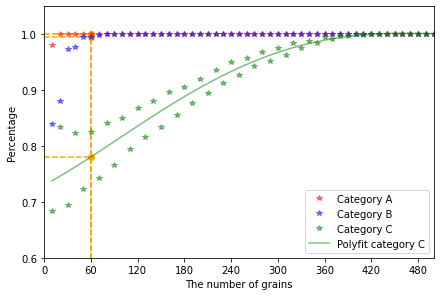

In [12]:
fig = plt.figure(figsize=(6,4), constrained_layout=True)

#sample_tests = [17849, 8890, 17473]
#sample_tests = ['R0069-S0466', 'S26795-R3363', 'S17849-R2653']
sample_tests = ['R0069-S0466', 'S06710-R928', 'S17849-R2653']
colors = ['r','b','g']
ployfits = [False, False, True]
run_times = 500
df_ratios = DataFrame()
fit_equation =[]
for i, sample_test in enumerate(sample_tests):
    all_ca, da = ca_da(sample_test)
    df_ratio = n_r(sample_test, all_ca, da, run_times)
    fit_equation.append(fitplot(df_ratio,colors[i],ployfit = ployfits[i]))
    df_ratios = df_ratios.append(df_ratio)
plt.xlim(0,500)
#plt.yticks(np.arange(0.6,1.1,0.1),labels=['60','70','80','90','100'])

print(fit_equation)
plt.savefig('plots/figures/Figure2.png',dpi=600)
plt.savefig('plots/figures/Figure2.pdf')

In [13]:
df_ratios[df_ratios['number']==60]

,type,number,ratio,ratio_A,ratio_B,ratio_C
5,A,60,1.0000,1.0,0.0000,0.0000
5,B,60,0.9958,0.0,0.9958,0.0042
5,C,60,0.8252,0.0,0.1748,0.8252
